# IMPORT

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science','grid','notebook'])
plt.rcParams['figure.figsize'] = (7.5,5)
import pandas as pd

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, HistGradientBoostingClassifier

from sklearn.metrics import classification_report, RocCurveDisplay, PrecisionRecallDisplay, ConfusionMatrixDisplay

# LOAD DATASET

In [2]:
dataframe = pd.read_csv('./Datasets/loan_default.csv')

In [135]:
dataframe.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [5]:
print(dataframe.shape)
print(dataframe.columns)

(255347, 18)
Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')


# CLEANING, PREPROCESSING, SCALING

In [3]:
X = dataframe.drop(columns = ['Default','LoanID',   
                              'Education','EmploymentType','MaritalStatus','HasMortgage','HasDependents','LoanPurpose','HasCoSigner'], axis = 1)
y = dataframe['Default']

In [17]:
X

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio
0,56,85994,50587,520,80,4,15.23,36,0.44
1,69,50432,124440,458,15,1,4.81,60,0.68
2,46,84208,129188,451,26,3,21.17,24,0.31
3,32,31713,44799,743,0,3,7.07,24,0.23
4,60,20437,9139,633,8,4,6.51,48,0.73
...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,12,0.85
255343,32,51953,189899,511,14,2,11.55,24,0.21
255344,56,84820,208294,597,70,3,5.29,60,0.50
255345,42,85109,60575,809,40,1,20.90,48,0.44


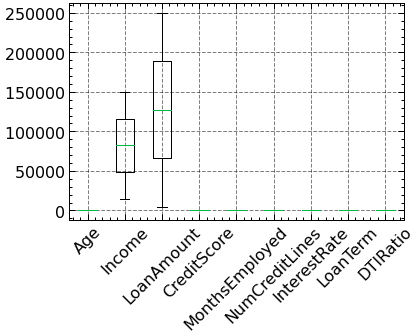

In [4]:
plt.boxplot(X, labels=[i for i in X.columns])
plt.xticks(rotation=45)
plt.show()
#No outliers

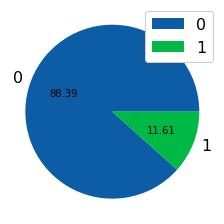

Number of 0 and 1:
 0    225694
1     29653
Name: Default, dtype: int64


In [5]:
default_counts = dataframe['Default'].value_counts()
plt.pie(default_counts, labels=default_counts.index, autopct='%.2f')
plt.legend()
plt.show()
print('Number of 0 and 1:\n',default_counts)

In [22]:
#Needs to be encode:
#Education -> Ordinal
#EmploymentType -> OneHot
#MaritalStatus -> OneHot
#HasMortgage -> OneHot
#HasDependents -> OneHot
#LoanPurpose -> OneHot
#HasCoSigner -> OneHot

X['Education'].unique()

array(["Bachelor's", "Master's", 'High School', 'PhD'], dtype=object)

In [6]:
#ordinal_enc = OrdinalEncoder(categories = [["High School","Bachelor's","Master's","PhD"]])
#onehot_enc = OneHotEncoder(drop = 'if_binary')


#column_transformer = make_column_transformer(
#    (ordinal_enc, ['Education']),
#    (onehot_enc, ['EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents','LoanPurpose', 'HasCoSigner']),
#    remainder = 'passthrough'
#)

In [6]:
std_scaler = StandardScaler()

In [11]:
X

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio
0,56,85994,50587,520,80,4,15.23,36,0.44
1,69,50432,124440,458,15,1,4.81,60,0.68
2,46,84208,129188,451,26,3,21.17,24,0.31
3,32,31713,44799,743,0,3,7.07,24,0.23
4,60,20437,9139,633,8,4,6.51,48,0.73
...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,12,0.85
255343,32,51953,189899,511,14,2,11.55,24,0.21
255344,56,84820,208294,597,70,3,5.29,60,0.50
255345,42,85109,60575,809,40,1,20.90,48,0.44


In [140]:
X.shape

(255347, 9)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y)
X_train_smote, y_train_smote = SMOTE().fit_resample(X, y)

In [8]:
print('y_train 0 and 1: \n',y_train.value_counts())
print('y_train_smote 0 and 1: \n', y_train_smote.value_counts())
print('y_test 0 and 1: \n', y_test.value_counts())

y_train 0 and 1: 
 0    157985
1     20757
Name: Default, dtype: int64
y_train_smote 0 and 1: 
 0    225694
1    225694
Name: Default, dtype: int64
y_test 0 and 1: 
 0    67709
1     8896
Name: Default, dtype: int64


In [9]:
X_train = std_scaler.fit_transform(X_train)
X_train_smote = std_scaler.fit_transform(X_train_smote)
X_test = std_scaler.transform(X_test)

In [10]:
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)

print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

print('X_train smote shape: ', X_train_smote.shape)
print('y_train_smote shape: ', y_train_smote.shape)

X_train shape:  (178742, 9)
y_train shape:  (178742,)
X_test shape:  (76605, 9)
y_test shape:  (76605,)
X_train smote shape:  (451388, 9)
y_train_smote shape:  (451388,)


In [15]:
X_test

array([[ 0.19451028,  0.54527755, -1.75637404, ...,  1.17060698,
         0.77233653, -1.34098632],
       [-0.94654363,  1.18635482,  1.31864868, ..., -1.10583461,
         0.77233653,  0.81674246],
       [ 1.83477527,  1.06574009,  0.432196  , ...,  0.05919653,
        -0.7563502 ,  0.81674246],
       ...,
       [-1.44575472,  1.17628698, -0.7899565 , ...,  0.03482349,
        -1.52069357,  0.01932095],
       [ 0.26582615, -1.28136278,  0.56020478, ...,  1.58007399,
        -0.7563502 , -1.10645058],
       [-1.37443885, -0.18085304,  0.84350846, ...,  1.49233106,
        -0.7563502 , -1.76315064]])

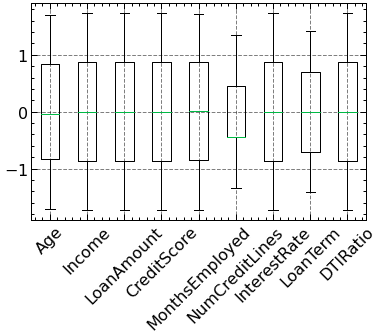

In [11]:
plt.boxplot(X_train, labels=[i for i in X.columns])
plt.xticks(rotation=45)
plt.show()
#After standardization

# MODEL BUILD

In [145]:
LR_model = LogisticRegression().fit(X_train, y_train)
KNN_model = KNeighborsClassifier().fit(X_train, y_train)
DT_model = DecisionTreeClassifier().fit(X_train, y_train)

AB_model = AdaBoostClassifier().fit(X_train, y_train)
RF_model = RandomForestClassifier().fit(X_train, y_train)
HGB_model = HistGradientBoostingClassifier().fit(X_train, y_train)

In [12]:
LR = LogisticRegression().fit(X_train_smote, y_train_smote)
KNN = KNeighborsClassifier().fit(X_train_smote, y_train_smote)
DT = DecisionTreeClassifier().fit(X_train_smote, y_train_smote)

AB = AdaBoostClassifier().fit(X_train_smote, y_train_smote)
RF = RandomForestClassifier().fit(X_train_smote, y_train_smote)
HGB = HistGradientBoostingClassifier().fit(X_train_smote, y_train_smote)

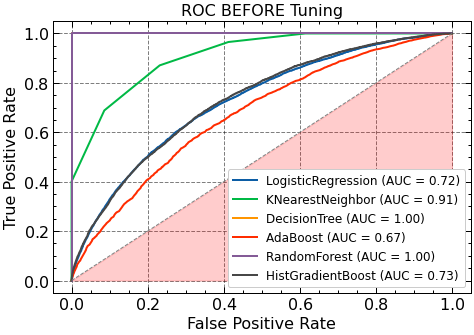

In [15]:
ax = plt.gca()

RocCurveDisplay.from_estimator(LR, X_test,y_test, ax = ax, name = 'LogisticRegression')
RocCurveDisplay.from_estimator(KNN, X_test, y_test, ax = ax, name = 'KNearestNeighbor')
RocCurveDisplay.from_estimator(DT, X_test, y_test, ax = ax, name = 'DecisionTree')

RocCurveDisplay.from_estimator(AB, X_test, y_test, ax = ax, name = 'AdaBoost')
RocCurveDisplay.from_estimator(RF, X_test, y_test, ax = ax, name = 'RandomForest')
RocCurveDisplay.from_estimator(HGB, X_test, y_test, ax = ax, name = 'HistGradientBoost')

plt.plot([0,1], [0,1], c = 'gray', linestyle = '--', linewidth = 1)

plt.fill_between([0,1], [0,1], color = 'red', alpha = 0.2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC BEFORE Tuning')
plt.legend(loc = 'best', fontsize = 12)
plt.show()

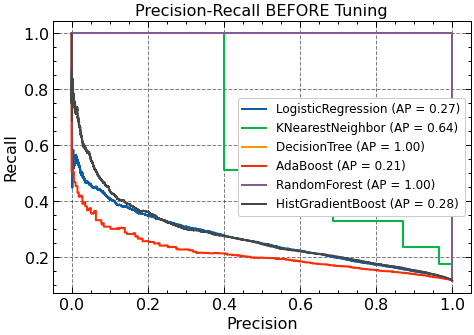

In [17]:
ax = plt.gca()

PrecisionRecallDisplay.from_estimator(LR, X_test,y_test, ax = ax, name = 'LogisticRegression')
PrecisionRecallDisplay.from_estimator(KNN, X_test, y_test, ax = ax, name = 'KNearestNeighbor')
PrecisionRecallDisplay.from_estimator(DT, X_test, y_test, ax = ax, name = 'DecisionTree')

PrecisionRecallDisplay.from_estimator(AB, X_test, y_test, ax = ax, name = 'AdaBoost')
PrecisionRecallDisplay.from_estimator(RF, X_test, y_test, ax = ax, name = 'RandomForest')
PrecisionRecallDisplay.from_estimator(HGB, X_test, y_test, ax = ax, name = 'HistGradientBoost')

plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision-Recall BEFORE Tuning')
plt.legend(loc = 'best', fontsize = 12)
plt.show()

In [18]:
y_pred_lr_smote = LR.predict(X_test)
y_pred_knn_smote = KNN.predict(X_test)
y_pred_dt_smote = DT.predict(X_test)

y_pred_ab_smote = AB.predict(X_test)
y_pred_rf_smote = RF.predict(X_test)
y_pred_hgb_smote = HGB.predict(X_test)

In [21]:
print('LR: ',LR.score(X_test, y_test))
print('KNN: ',KNN.score(X_test, y_test))
print('DT: ',DT.score(X_test, y_test))

print('AB: ',AB.score(X_test, y_test))
print('RF: ',RF.score(X_test, y_test))
print('HGB: ',HGB.score(X_test, y_test))

LR:  0.6721232295542067
KNN:  0.7802623849618171
DT:  1.0
AB:  0.7742836629462829
RF:  1.0
HGB:  0.8575810978395666


In [146]:
y_pred_lr = LR_model.predict(X_test)
y_pred_knn = KNN_model.predict(X_test)
y_pred_dt = DT_model.predict(X_test)

y_pred_ab = AB_model.predict(X_test)
y_pred_rf = RF_model.predict(X_test)
y_pred_hgb = HGB_model.predict(X_test)

### ROC and Precision-Recall plots

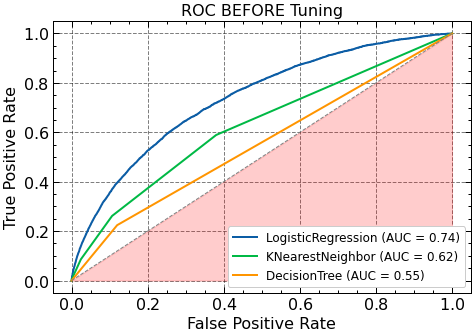

In [148]:
ax = plt.gca()

RocCurveDisplay.from_estimator(LR_model, X_test,y_test, ax = ax, name = 'LogisticRegression')
RocCurveDisplay.from_estimator(KNN_model, X_test, y_test, ax = ax, name = 'KNearestNeighbor')
RocCurveDisplay.from_estimator(DT_model, X_test, y_test, ax = ax, name = 'DecisionTree')
plt.plot([0,1], [0,1], c = 'gray', linestyle = '--', linewidth = 1)

plt.fill_between([0,1], [0,1], color = 'red', alpha = 0.2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC BEFORE Tuning')
plt.legend(loc = 'best', fontsize = 12)
plt.show()

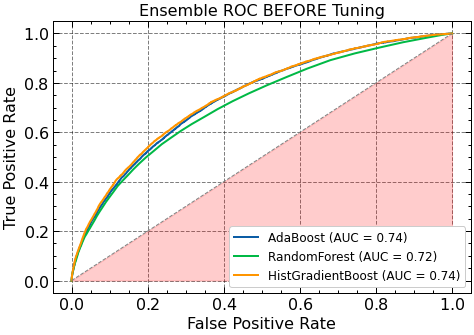

In [149]:
ax = plt.gca()

RocCurveDisplay.from_estimator(AB_model, X_test, y_test, ax = ax, name = 'AdaBoost')
RocCurveDisplay.from_estimator(RF_model, X_test, y_test, ax = ax, name = 'RandomForest')
RocCurveDisplay.from_estimator(HGB_model, X_test, y_test, ax = ax, name = 'HistGradientBoost')
plt.plot([0,1], [0,1], c = 'gray', linestyle = '--', linewidth = 1)

plt.fill_between([0,1], [0,1], color = 'red', alpha = 0.2)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Ensemble ROC BEFORE Tuning')
plt.legend(loc = 'best', fontsize = 12)
plt.show()

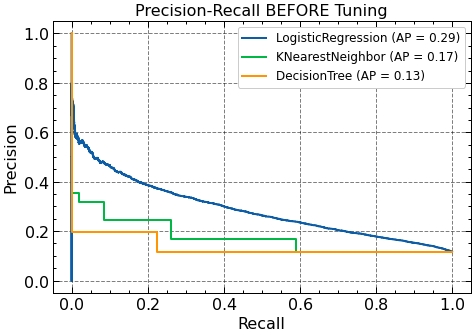

In [150]:
ax = plt.gca()

PrecisionRecallDisplay.from_estimator(LR_model, X_test, y_test, ax = ax, name = 'LogisticRegression')
PrecisionRecallDisplay.from_estimator(KNN_model, X_test, y_test, ax = ax, name = 'KNearestNeighbor')
PrecisionRecallDisplay.from_estimator(DT_model, X_test, y_test, ax = ax, name = 'DecisionTree')


plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall BEFORE Tuning')
plt.legend(loc = 'best', fontsize = 12)
plt.show()

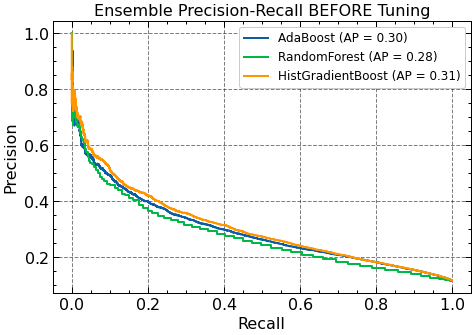

In [151]:
ax = plt.gca()

PrecisionRecallDisplay.from_estimator(AB_model, X_test, y_test, ax = ax, name = 'AdaBoost')
PrecisionRecallDisplay.from_estimator(RF_model, X_test, y_test, ax = ax, name = 'RandomForest')
PrecisionRecallDisplay.from_estimator(HGB_model, X_test, y_test, ax = ax, name = 'HistGradientBoost')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Ensemble Precision-Recall BEFORE Tuning')
plt.legend(loc = 'best', fontsize = 12)
plt.show()

### Classification reports

In [152]:
print('Logistic Regression BEFORE Tuning:')
print(classification_report(y_test, y_pred_lr))

Logistic Regression BEFORE Tuning:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     67709
           1       0.56      0.02      0.04      8896

    accuracy                           0.88     76605
   macro avg       0.72      0.51      0.49     76605
weighted avg       0.85      0.88      0.83     76605



In [153]:
print('K-Nearest Neighbor  BEFORE Tuning:')
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbor  BEFORE Tuning:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93     67709
           1       0.32      0.09      0.14      8896

    accuracy                           0.87     76605
   macro avg       0.60      0.53      0.53     76605
weighted avg       0.82      0.87      0.84     76605



In [154]:
print('Decision Tree BEFORE Tuning:')
print(classification_report(y_test, y_pred_dt))

Decision Tree BEFORE Tuning:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89     67709
           1       0.20      0.22      0.21      8896

    accuracy                           0.80     76605
   macro avg       0.55      0.55      0.55     76605
weighted avg       0.82      0.80      0.81     76605



In [155]:

print('AdaBoost BEFORE Tuning:')
print(classification_report(y_test, y_pred_ab))

AdaBoost BEFORE Tuning:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     67709
           1       0.58      0.04      0.07      8896

    accuracy                           0.88     76605
   macro avg       0.73      0.52      0.50     76605
weighted avg       0.85      0.88      0.84     76605



In [156]:
print('Random Forest BEFORE Tuning:')
print(classification_report(y_test, y_pred_rf))

Random Forest BEFORE Tuning:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     67709
           1       0.54      0.05      0.10      8896

    accuracy                           0.88     76605
   macro avg       0.71      0.52      0.52     76605
weighted avg       0.85      0.88      0.84     76605



In [157]:
print('Histogram Gradient Boost BEFORE Tuning:')
print(classification_report(y_test, y_pred_hgb))

Histogram Gradient Boost BEFORE Tuning:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     67709
           1       0.59      0.05      0.09      8896

    accuracy                           0.89     76605
   macro avg       0.74      0.52      0.52     76605
weighted avg       0.85      0.89      0.84     76605



# HYPERPARAMETER TUNING

In [22]:
strat_kfold = StratifiedKFold(n_splits = 5, shuffle = True)

### Classical model tuning

In [159]:
#TODO: param grid to all the classification algos(LR, KNN, DT -- AB, RF, HGB)
#l1: saga, liblinear
#l2: lbfgs, newton-cg, sag, saga

LR_param_grid = {
    'penalty' : [None,' l1', 'l2', 'elasticnet'],
    'C' : np.logspace(0.01, 10, 40),
    'solver' : ['lbfgs', 'saga'],
    'warm_start' : [True, False]
}

LR_gridsearch = GridSearchCV(LogisticRegression(), param_grid = LR_param_grid, cv = strat_kfold, n_jobs=-1).fit(X_train, y_train)

c:\Users\oscar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
2400 fits failed out of a total of 3200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
800 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\oscar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\oscar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\oscar\AppData\Local\Programs

In [160]:
y_pred_lr_gridsearch = LR_gridsearch.predict(X_test)

print('LR Gridsearch params: ',LR_gridsearch.best_params_)
print(f'LR Gridsearch score: [{round(LR_gridsearch.best_score_, 6)}]')
print('LR Basic params: ', LR_model.get_params())
print(f'LR Basic score: [{round(LR_model.score(X_test,y_test), 6)}]')

LR Gridsearch params:  {'C': 1.023292992280754, 'penalty': 'l2', 'solver': 'lbfgs', 'warm_start': True}
LR Gridsearch score: [0.884666]
LR Basic params:  {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
LR Basic score: [0.884368]


In [180]:
KNN_param_grid = {
    'n_neighbors' : [5, 11, 15, 21, 25, 31, 35, 41, 45, 51],
    'weights' : ['uniform', 'distance']
}

KNN_gridsearch = GridSearchCV(KNeighborsClassifier(), param_grid = KNN_param_grid, cv = strat_kfold, n_jobs = -1).fit(X_train, y_train)

In [181]:
y_pred_knn_gridsearch = KNN_gridsearch.predict(X_test)

print('KNN Gridsearch params: ',KNN_gridsearch.best_params_)
print(f'KNN Gridsearch score: [{round(KNN_gridsearch.best_score_, 6)}]')
print('KNN Basic params: ', KNN_model.get_params())
print(f'KNN Basic score: [{round(KNN_model.score(X_test,y_test), 6)}]')

KNN Gridsearch params:  {'n_neighbors': 45, 'weights': 'uniform'}
KNN Gridsearch score: [0.884414]
KNN Basic params:  {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
KNN Basic score: [0.872254]


In [182]:
DT_param_grid = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_depth' : [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf' : [3, 5, 7, 11, 13, 17, 21]
}
#EDDIG 4 A LEGJOBB
#HA ALKALMAZTAM A VAGAST, AKKOR A JOBB OLDALRA SENKIT NEM TETT
#ccp_alpha- azaz vagas nem alkalmazando, mert tultanulast eredmenyez

DT_gridsearch = GridSearchCV(DecisionTreeClassifier(), param_grid = DT_param_grid, cv = strat_kfold, n_jobs = -1)
DT_gridsearch.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [3, 5, 7, 11, 13, 17, 21]})

In [183]:
y_pred_dt_gridsearch = DT_gridsearch.predict(X_test)

print('DT Gridsearch params: ',DT_gridsearch.best_params_)
print(f'DT Gridsearch score: [{round(DT_gridsearch.best_score_, 6)}]')
print('DT Basic params: ', DT_model.get_params())
print(f'DT Basic score: [{round(DT_model.score(X_test,y_test), 6)}]')

DT Gridsearch params:  {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 7}
DT Gridsearch score: [0.884901]
DT Basic params:  {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
DT Basic score: [0.804008]


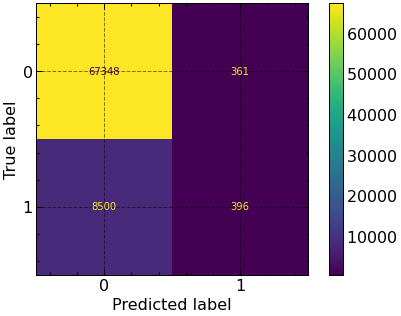

In [184]:
ConfusionMatrixDisplay.from_estimator(DT_gridsearch, X_test, y_test)

### Ensemble model tuning

In [185]:
AB_param_grid = {
    'n_estimators' : [25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350]
}

AB_gridsearch = GridSearchCV(AdaBoostClassifier(), param_grid = AB_param_grid, cv = strat_kfold, n_jobs = -1).fit(X_train, y_train)

In [186]:
y_pred_ab_gridsearch = AB_gridsearch.predict(X_test)

print('AB Gridsearch params: ',AB_gridsearch.best_params_)
print(f'AB Gridsearch score: [{round(AB_gridsearch.best_score_, 6)}]')
print('AB Basic params: ', AB_model.get_params())
print(f'AB Basic score: [{round(AB_model.score(X_test,y_test), 6)}]')

AB Gridsearch params:  {'n_estimators': 200}
AB Gridsearch score: [0.885399]
AB Basic params:  {'algorithm': 'SAMME.R', 'base_estimator': None, 'learning_rate': 1.0, 'n_estimators': 50, 'random_state': None}
AB Basic score: [0.884994]


In [187]:
RF_param_grid = {
    'n_estimators' : [5, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300]
}

RF_gridsearch = GridSearchCV(RandomForestClassifier(), param_grid = RF_param_grid, cv = strat_kfold, n_jobs = -1).fit(X_train, y_train)

In [188]:
y_pred_rf_gridsearch = RF_gridsearch.predict(X_test)

print('RF Randomsearch params: ',RF_gridsearch.best_params_)
print(f'RF Randomsearch score: [{round(RF_gridsearch.best_score_, 6)}]')
print('RF Basic params: ', RF_model.get_params())
print(f'RF Basic score: [{round(RF_model.score(X_test,y_test), 6)}]')

RF Randomsearch params:  {'n_estimators': 300}
RF Randomsearch score: [0.884873]
RF Basic params:  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
RF Basic score: [0.884681]


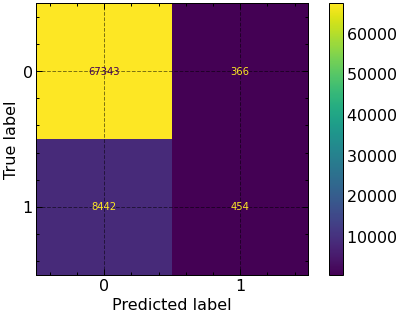

In [189]:
ConfusionMatrixDisplay.from_estimator(RF_gridsearch, X_test, y_test)

In [190]:
HGB_param_grid = {
    'max_depth' : [3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [5, 10, 15, 20, 25],
    'warm_start' : [True, False]
}

HGB_gridsearch = GridSearchCV(HistGradientBoostingClassifier(), param_grid=HGB_param_grid, cv=strat_kfold, n_jobs=-1).fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=HistGradientBoostingClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [5, 10, 15, 20, 25],
                         'warm_start': [True, False]})

In [191]:
y_pred_hgb_gridsearch = HGB_gridsearch.predict(X_test)

print('HGB Gridsearch params: ',HGB_gridsearch.best_params_)
print(f'HGB Gridsearch score: [{round(HGB_gridsearch.best_score_, 6)}]')
print('HGB Basic params: ', HGB_model.get_params())
print(f'HGB Basic score: [{round(HGB_model.score(X_test,y_test), 6)}]')

HGB Gridsearch params:  {'max_depth': 4, 'min_samples_leaf': 15, 'warm_start': True}
HGB Gridsearch score: [0.885953]
HGB Basic params:  {'categorical_features': None, 'early_stopping': 'auto', 'l2_regularization': 0.0, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_bins': 255, 'max_depth': None, 'max_iter': 100, 'max_leaf_nodes': 31, 'min_samples_leaf': 20, 'monotonic_cst': None, 'n_iter_no_change': 10, 'random_state': None, 'scoring': 'loss', 'tol': 1e-07, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
HGB Basic score: [0.885634]


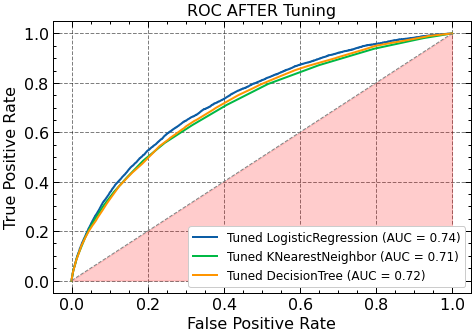

In [193]:
ax = plt.gca()

RocCurveDisplay.from_estimator(LR_gridsearch, X_test, y_test, ax = ax, name = 'Tuned LogisticRegression')
RocCurveDisplay.from_estimator(KNN_gridsearch, X_test, y_test, ax = ax, name = 'Tuned KNearestNeighbor')
RocCurveDisplay.from_estimator(DT_gridsearch, X_test, y_test, ax = ax, name = 'Tuned DecisionTree')


plt.fill_between([0,1], [0,1], color = 'red', alpha = 0.2)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0,1],[0,1], c = 'gray', linestyle = '--', linewidth = 1)
plt.title('ROC AFTER Tuning')
plt.legend(loc = 'best', fontsize = 12)
plt.show()

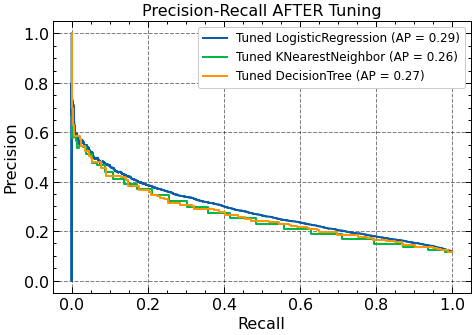

In [194]:
ax = plt.gca()

PrecisionRecallDisplay.from_estimator(LR_gridsearch, X_test, y_test, ax = ax, name = 'Tuned LogisticRegression')
PrecisionRecallDisplay.from_estimator(KNN_gridsearch, X_test, y_test, ax = ax, name = 'Tuned KNearestNeighbor')
PrecisionRecallDisplay.from_estimator(DT_gridsearch, X_test, y_test, ax = ax, name = 'Tuned DecisionTree')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall AFTER Tuning')
plt.legend(loc = 'best', fontsize = 12)
plt.show()

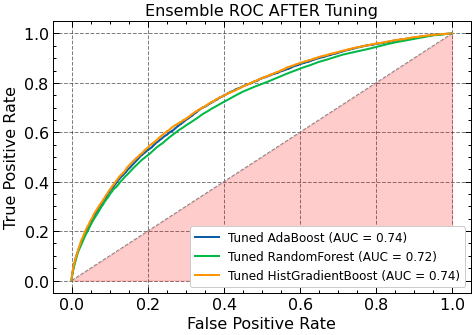

In [195]:
ax = plt.gca()

RocCurveDisplay.from_estimator(AB_gridsearch, X_test, y_test, ax = ax, name = 'Tuned AdaBoost')
RocCurveDisplay.from_estimator(RF_gridsearch, X_test, y_test, ax = ax, name = 'Tuned RandomForest')
RocCurveDisplay.from_estimator(HGB_gridsearch, X_test, y_test, ax = ax, name = 'Tuned HistGradientBoost')


plt.fill_between([0,1], [0,1], color = 'red', alpha = 0.2)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0,1], [0,1], c = 'gray', linestyle = '--', linewidth = 1)
plt.title('Ensemble ROC AFTER Tuning')
plt.legend(loc = 'best', fontsize = 12)
plt.show()

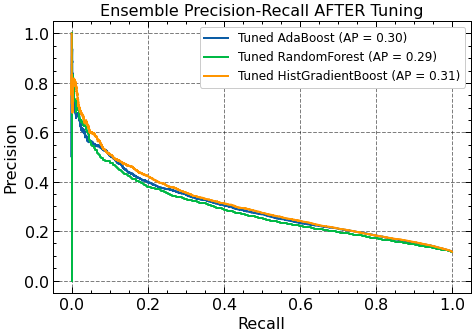

In [196]:
ax = plt.gca()

PrecisionRecallDisplay.from_estimator(AB_gridsearch, X_test, y_test, ax = ax, name = 'Tuned AdaBoost')
PrecisionRecallDisplay.from_estimator(RF_gridsearch, X_test, y_test, ax = ax, name = 'Tuned RandomForest')
PrecisionRecallDisplay.from_estimator(HGB_gridsearch, X_test, y_test, ax = ax, name = 'Tuned HistGradientBoost')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Ensemble Precision-Recall AFTER Tuning')
plt.legend(loc = 'best', fontsize = 12)
plt.show()

# ALGORITHM SCORES BEFORE AND AFTER TUNING

### Scores

In [197]:
print('||SCORES BEFORE TUNING||')

print(f'Logistic Regression:\t\t[{round(LR_model.score(X_test, y_test), 5)}]')
print(f'K-Nearest Neighbor:\t\t[{round(KNN_model.score(X_test, y_test), 5)}]')
print(f'Decision Tree:\t\t\t[{round(DT_model.score(X_test, y_test), 5)}]')
print('-' * 41)
print(f'AdaBoost:\t\t\t[{round(AB_model.score(X_test, y_test), 5)}]') 
print(f'Random Forest:\t\t\t[{round(RF_model.score(X_test, y_test), 5)}]')
print(f'Hist Gradient Boosting:\t\t[{round(HGB_model.score(X_test, y_test), 5)}]')

print()
print('*'*41)
print()

print('||SCORES AFTER TUNING||')

print(f'Tuned Logistic Regression:\t[{round(LR_gridsearch.score(X_test, y_test), 5)}]')
print(f'Tuned K-Nearest Neighbor:\t[{round(KNN_gridsearch.score(X_test, y_test), 5)}]')
print(f'Tuned Decision Tree:\t\t[{round(DT_gridsearch.score(X_test, y_test), 5)}]')
print('-' * 41)
print(f'Tuned AdaBoost:\t\t\t[{round(AB_gridsearch.score(X_test, y_test), 5)}]') 
print(f'Tuned Random Forest:\t\t[{round(RF_gridsearch.score(X_test, y_test), 5)}]')
print(f'Tuned Hist Gradient Boosting:\t[{round(HGB_gridsearch.score(X_test, y_test), 5)}]')

||SCORES BEFORE TUNING||
Logistic Regression:		[0.88437]
K-Nearest Neighbor:		[0.87225]
Decision Tree:			[0.80401]
-----------------------------------------
AdaBoost:			[0.88499]
Random Forest:			[0.88468]
Hist Gradient Boosting:		[0.88563]

*****************************************

||SCORES AFTER TUNING||
Tuned Logistic Regression:	[0.88437]
Tuned K-Nearest Neighbor:	[0.88428]
Tuned Decision Tree:		[0.88433]
-----------------------------------------
Tuned AdaBoost:			[0.88514]
Tuned Random Forest:		[0.88502]
Tuned Hist Gradient Boosting:	[0.88595]


### Classification reports

In [198]:
print('||Logistic Regression BEFORE Tuning||')
print(classification_report(y_test, y_pred_lr))

print()

print('||Logistic Regression AFTER Tuning||')
print(classification_report(y_test, y_pred_lr_gridsearch))

||Logistic Regression BEFORE Tuning||
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     67709
           1       0.56      0.02      0.04      8896

    accuracy                           0.88     76605
   macro avg       0.72      0.51      0.49     76605
weighted avg       0.85      0.88      0.83     76605


||Logistic Regression AFTER Tuning||
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     67709
           1       0.56      0.02      0.04      8896

    accuracy                           0.88     76605
   macro avg       0.72      0.51      0.49     76605
weighted avg       0.85      0.88      0.83     76605



In [199]:
print('||K-Nearest Neighbor BEFORE Tuning||')
print(classification_report(y_test, y_pred_knn))

print()

print('||K-Nearest Neighbor AFTER Tuning||')
print(classification_report(y_test, y_pred_knn_gridsearch))

||K-Nearest Neighbor BEFORE Tuning||
              precision    recall  f1-score   support

           0       0.89      0.98      0.93     67709
           1       0.32      0.09      0.14      8896

    accuracy                           0.87     76605
   macro avg       0.60      0.53      0.53     76605
weighted avg       0.82      0.87      0.84     76605


||K-Nearest Neighbor AFTER Tuning||
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     67709
           1       0.57      0.01      0.03      8896

    accuracy                           0.88     76605
   macro avg       0.73      0.51      0.48     76605
weighted avg       0.85      0.88      0.83     76605



In [200]:
print('||Decision Tree BEFORE Tuning||')
print(classification_report(y_test, y_pred_dt))

print()

print('||Decision Tree AFTER Tuning||')
print(classification_report(y_test, y_pred_dt_gridsearch))

||Decision Tree BEFORE Tuning||
              precision    recall  f1-score   support

           0       0.90      0.88      0.89     67709
           1       0.20      0.22      0.21      8896

    accuracy                           0.80     76605
   macro avg       0.55      0.55      0.55     76605
weighted avg       0.82      0.80      0.81     76605


||Decision Tree AFTER Tuning||
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     67709
           1       0.52      0.04      0.08      8896

    accuracy                           0.88     76605
   macro avg       0.71      0.52      0.51     76605
weighted avg       0.85      0.88      0.84     76605



In [201]:
print('||AdaBoost BEFORE Tuning||')
print(classification_report(y_test, y_pred_ab))

print()

print('||AdaBoost AFTER Tuning||')
print(classification_report(y_test, y_pred_ab_gridsearch))

||AdaBoost BEFORE Tuning||
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     67709
           1       0.58      0.04      0.07      8896

    accuracy                           0.88     76605
   macro avg       0.73      0.52      0.50     76605
weighted avg       0.85      0.88      0.84     76605


||AdaBoost AFTER Tuning||
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     67709
           1       0.58      0.04      0.08      8896

    accuracy                           0.89     76605
   macro avg       0.73      0.52      0.51     76605
weighted avg       0.85      0.89      0.84     76605



In [202]:
print('||RandomForest BEFORE Tuning||')
print(classification_report(y_test, y_pred_rf))

print()

print('||RandomForest AFTER Tuning||')
print(classification_report(y_test, y_pred_rf_gridsearch))

||RandomForest BEFORE Tuning||
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     67709
           1       0.54      0.05      0.10      8896

    accuracy                           0.88     76605
   macro avg       0.71      0.52      0.52     76605
weighted avg       0.85      0.88      0.84     76605


||RandomForest AFTER Tuning||
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     67709
           1       0.55      0.05      0.09      8896

    accuracy                           0.89     76605
   macro avg       0.72      0.52      0.52     76605
weighted avg       0.85      0.89      0.84     76605



In [203]:
print('||HistGradientBoost BEFORE Tuning||')
print(classification_report(y_test, y_pred_hgb))

print()

print('||HistGradientBoost AFTER Tuning||')
print(classification_report(y_test, y_pred_hgb_gridsearch))

||HistGradientBoost BEFORE Tuning||
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     67709
           1       0.59      0.05      0.09      8896

    accuracy                           0.89     76605
   macro avg       0.74      0.52      0.52     76605
weighted avg       0.85      0.89      0.84     76605


||HistGradientBoost AFTER Tuning||
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     67709
           1       0.59      0.06      0.10      8896

    accuracy                           0.89     76605
   macro avg       0.74      0.53      0.52     76605
weighted avg       0.85      0.89      0.84     76605



In [96]:
data = {
    'LogisticRegression' : [0.85, 0.88, 0.83, 0.74],
    'KNearestNeighbor' : [0.85, 0.88, 0.83, 0.71],
    'DecisionTree' : [0.85, 0.88, 0.84, 0.72]
}



ensemble_cols = ['AdaBoost', 'RandomForest', 'HistGradientBoost']

idx= ['Precision', 'Recall', 'F1','AUC']
cols = ['LogisticRegression','KNearestNeighbor','DecisionTree']
model_performances = pd.DataFrame(data, columns=cols,
                                  index=idx)



In [97]:
model_performances

,LogisticRegression,KNearestNeighbor,DecisionTree
Precision,0.85,0.85,0.85
Recall,0.88,0.88,0.88
F1,0.83,0.83,0.84
AUC,0.74,0.71,0.72


In [68]:
ensemble_data = {
    'AdaBoost' : [0.85, 0.89, 0.84, 0.74],
    'RandomForest' : [0.85, 0.89, 0.84, 0.72],
    'HistGradientBoost' : [0.85, 0.89, 0.84, 0.74]
}

ensemble_cols = ['AdaBoost', 'RandomForest', 'HistGradientBoost']


ensemble_model_perfocmances = pd.DataFrame(ensemble_data, columns=ensemble_cols, index=idx)

In [69]:
ensemble_model_perfocmances

,AdaBoost,RandomForest,HistGradientBoost
Precision,0.85,0.85,0.85
Recall,0.89,0.89,0.89
F1,0.84,0.84,0.84
AUC,0.74,0.72,0.74


In [84]:
model_performances

,LogisticRegression,KNearestNEighbor,DecisionTree
Precision,0.85,0.85,0.85
Recall,0.88,0.88,0.88
F1,0.83,0.83,0.84
AUC,0.74,0.71,0.72


In [38]:
lr_param_grid = {
    'penalty' : ['none', 'l1', 'l2', 'elasticnet'],
    'C' : np.logspace(0.001, 10, 30),
    'solver' : ['lbfgs', 'saga'],
    'l1_ratio' : [0, 0.25, 0.5, 0.75, 1],
    'warm_start' : [True, False]
}

LR_gs = GridSearchCV(LogisticRegression(), param_grid = lr_param_grid, cv = strat_kfold, n_jobs=-1).fit(X_train_smote, y_train_smote)

y_pred_lr_gs = LR_gs.predict(X_test)

c:\Users\oscar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
3000 fits failed out of a total of 12000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1500 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\oscar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\oscar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\oscar\AppData\Local\Progra

In [42]:
knn_param_grid = {
    'n_neighbors' : [5, 11, 17, 23, 27, 31, 37, 41]
}

KNN_gs = GridSearchCV(KNeighborsClassifier(), param_grid=knn_param_grid, cv=strat_kfold, n_jobs=-1).fit(X_train_smote, y_train_smote)

y_pred_knn_gs = KNN_gs.predict(X_test)

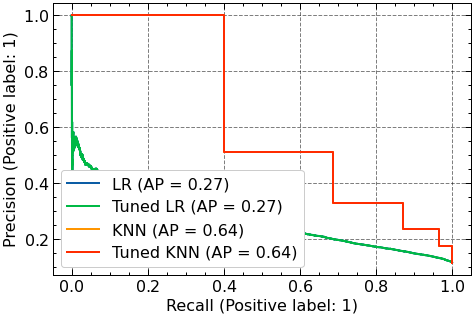

In [43]:
ax = plt.gca()

PrecisionRecallDisplay.from_estimator(LR, X_test, y_test, ax = ax, name='LR')
PrecisionRecallDisplay.from_estimator(LR_gs, X_test, y_test, ax = ax, name='Tuned LR')
PrecisionRecallDisplay.from_estimator(KNN, X_test, y_test, ax = ax, name='KNN')
PrecisionRecallDisplay.from_estimator(KNN_gs, X_test, y_test, ax = ax, name='Tuned KNN')


In [46]:
print('LR BEFORE:\n', classification_report(y_test, y_pred_lr_smote))
print('LR AFTER:\n', classification_report(y_test, y_pred_lr_gs))

LR BEFORE:
               precision    recall  f1-score   support

           0       0.94      0.67      0.78     67709
           1       0.21      0.66      0.32      8896

    accuracy                           0.67     76605
   macro avg       0.57      0.67      0.55     76605
weighted avg       0.85      0.67      0.73     76605

LR AFTER:
               precision    recall  f1-score   support

           0       0.94      0.67      0.78     67709
           1       0.21      0.66      0.32      8896

    accuracy                           0.67     76605
   macro avg       0.57      0.67      0.55     76605
weighted avg       0.85      0.67      0.73     76605



In [47]:
print('KNN BEFORE:\n', classification_report(y_test, y_pred_knn_smote))
print('KNN AFTER:\n', classification_report(y_test, y_pred_knn_gs))

KNN BEFORE:
               precision    recall  f1-score   support

           0       0.98      0.77      0.86     67709
           1       0.33      0.87      0.48      8896

    accuracy                           0.78     76605
   macro avg       0.65      0.82      0.67     76605
weighted avg       0.90      0.78      0.82     76605

KNN AFTER:
               precision    recall  f1-score   support

           0       0.98      0.77      0.86     67709
           1       0.33      0.87      0.48      8896

    accuracy                           0.78     76605
   macro avg       0.65      0.82      0.67     76605
weighted avg       0.90      0.78      0.82     76605

